<font size = 5>**LAB 11 PART 1**</font>

1) (a) Plot the sigmoid function. Print your interpretation on why this function is useful for a classification problem.

   (b) Plot the log functions in the cost function individually. Print your interpretation of the log functions

     c) Using your own data for a single feature problem, and assuming linear regression problem, plot the cost function and the corresponding contours. Also, using cross entropy as the cost function, plot it as well as its contours.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Text(0, 0.5, 'y')

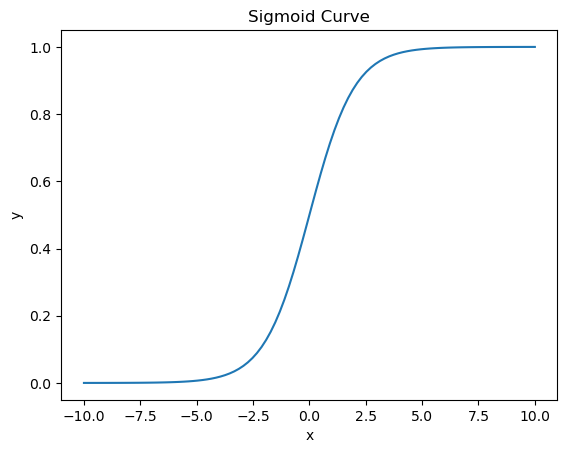

In [2]:
# (a)

x = np.linspace(-10,10,100)
y = sigmoid(x)

plt.plot(x,y)
plt.title("Sigmoid Curve")
plt.xlabel("x")
plt.ylabel("y")

print("For small x values the sigmoid function has almost zero value and for larger x values the sigmoid function takes value 1")
print("In classification problem we are required to give a boolean answer")
print("As the sigmoid function gives somewhat of a boolean answer while still being continuous it is a good hypothesis function for classification")

This log term decreases as the value of x increases. As x increase the the sigmoid function moves closer to 1.
When the target value is 1 and the sigmoid function is 1 then cost should be low , 
that is what the first term of the cross entropy cost function shows.



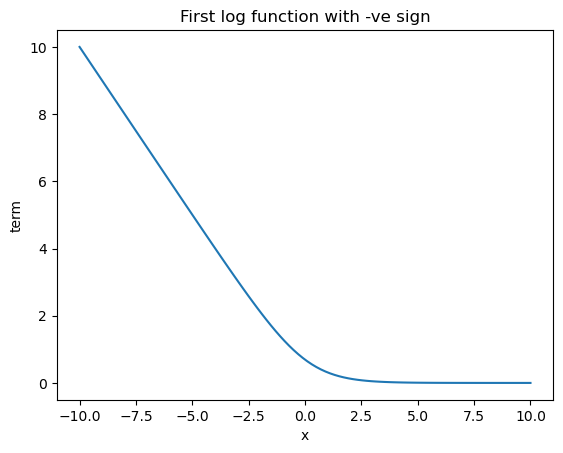

In [5]:
# (b)

x = np.linspace(-10,10,100)
y = -np.log(sigmoid(x))

plt.plot(x,y)
plt.title("First log function with -ve sign")
plt.xlabel("x")
plt.ylabel("term")
print("""This log term decreases as the value of x increases. As x increase the the sigmoid function moves closer to 1.
When the target value is 1 and the sigmoid function is 1 then cost should be low , 
that is what the first term of the cross entropy cost function shows.
""")

The cost increases as the value of x increases here. As x increases the the sigmoid function moves closer to 1.
When the target value is 0 and the sigmoid function near 1 then cost should be high , 
that is what the second term of the cross entropy cost function shows.
When the sigmoid function near 0 then the cost should be low as depicted. 

Basically when these terms are combined they give us the following : 
    When y value (target) is 1 and the predicted value is 0 (hypothesis function predicted less than 0.5) the loss 
    is high due to the -ylog(hw(x)) term in cross entropy.
    When y value (target) is 0 and the predicted value is 1 (hypothesis function predicted less than 0.5) the loss 
    is high due to the -(1-y)log(1-hw(x)) term in cross entropy.



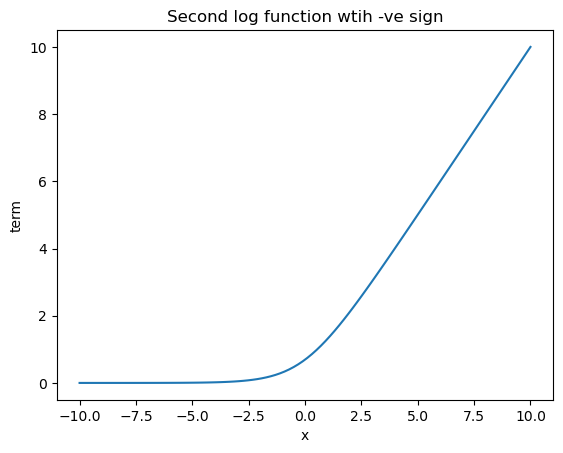

In [6]:
# (b)

x = np.linspace(-10,10,100)
y = -np.log(1 - sigmoid(x))

plt.plot(x,y)
plt.title("Second log function wtih -ve sign")
plt.xlabel("x")
plt.ylabel("term")
print("""The cost increases as the value of x increases here. As x increases the the sigmoid function moves closer to 1.
When the target value is 0 and the sigmoid function near 1 then cost should be high , 
that is what the second term of the cross entropy cost function shows.
When the sigmoid function near 0 then the cost should be low as depicted. 
""")

print("""Basically when these terms are combined they give us the following : 
    When y value (target) is 1 and the predicted value is 0 (hypothesis function predicted less than 0.5) the loss 
    is high due to the -ylog(hw(x)) term in cross entropy.
    When y value (target) is 1 and the predicted value is 1 (hypothesis function predicted more than 0.5) the loss is low.
    When y value (target) is 0 and the predicted value is 1 (hypothesis function predicted more than 0.5) the loss 
    is high due to the -(1-y)log(1-hw(x)) term in cross entropy.
    When y value (target) is 0 and the predicted value is 0 (hypothesis function predicted less than 0.5) the loss is low.

""")

In [9]:
# (c)
#Get classfication data below

df = pd.read_csv("data.csv")
df = df.sort_values(["x"])

x = np.array(df["x"])

ones = np.ones(200)
x = x.reshape((1,200))
x = np.concatenate(([ones],x),axis = 0)

y = np.array(df["y"])
y = y.reshape((1,200))

w = np.array([[1,1]])


#Below we create lin reg model that uses mse cost , log reg model that uses cross entropy

def loss_log(w,x,y):
    m = x.shape[0]
    
    sig_arr = sigmoid(w@x)
    losses = -y*np.log(sig_arr)-(1-y)*np.log(1-sig_arr)
    
    return np.sum(losses)/(2*m)

def grad_log(w,x,y):
    pred = sigmoid(w@x)
    m = x.shape[0]
    return ((pred-y)@x.T)/m

def loss_mse(w,x,y):
    m = x.shape[0]
    
    return np.sum((w@x-y)**2)/(2*m)

def grad_lin_reg(w,x,y):
    n = x.shape[0]
    m = x.shape[1]
    predicted = w@x
    
    #Now we find the gradient, array of m+1 elements , each corresponding to each weight
    
    return (x@(predicted.T - y.T)).T/m

class lin_reg:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def gradient_descent(self,num_iter,alpha):
        losses = []
        n = self.x.shape[0]
        m = self.x.shape[1] 
        w = np.random.rand(1,n) #initially set random weights 
        for i in range(0,num_iter):
            losses.append(loss_mse(w,self.x,self.y))
            grad = grad_lin_reg(w,self.x,self.y)
            w = w - grad*alpha
        return w,losses
    
class log_reg:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def gradient_descent(self,num_iter,alpha):
        losses = []
        n = self.x.shape[0]
        m = self.x.shape[1] 
        w = np.random.rand(1,n) #initially set random weights 
        for i in range(0,num_iter):
            losses.append(loss_log(w,self.x,self.y))
            grad = grad_log(w,self.x,self.y)
            w = w - grad*alpha
        return w,losses
    
    
    

Text(0, 0.5, 'loss mse')

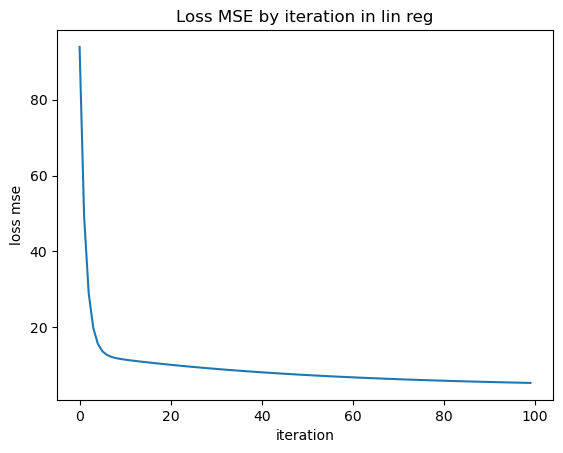

In [10]:
#Linear regression model on classification data

model = lin_reg(x,y)
weights,losses = model.gradient_descent(100,0.01)

plt.plot(losses)
plt.title("Loss MSE by iteration in lin reg")
plt.xlabel("iteration")
plt.ylabel("loss mse")


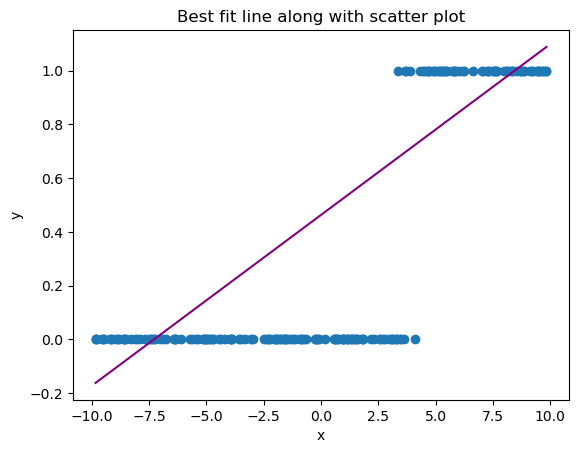

In [11]:


predicted = weights@x
linex = x[1].reshape((200,))
plt.scatter(x[1].reshape((1,200)),y)
plt.plot(linex,predicted.reshape(200,),color = "purple")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Best fit line along with scatter plot")
plt.show()


Text(0.5, 0, 'loss')

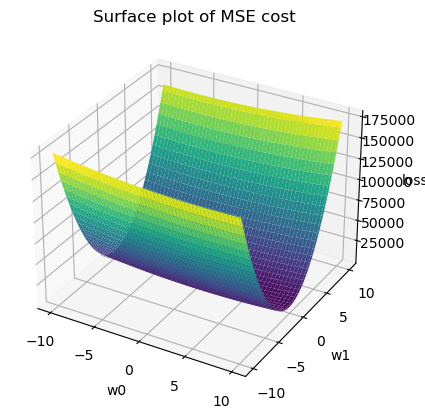

In [12]:
#Below we plot the contour plot of the mse cost in linear regression for different w0 , w1 values


w0 = np.linspace(-10,10,100)
w1 = np.linspace(-10,10,100)

W0,W1 = np.meshgrid(w0,w1)
costs = np.zeros(10000).reshape((100,100))

for i in range(100):
    for j in range(100):
        costs[i][j] = loss_mse(np.array([[W0[i][j],W1[i][j]]]),x,y)


fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
cp = ax.plot_surface(W0,W1,costs,cmap = "viridis")
ax.set_title("Surface plot of MSE cost")
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("loss")



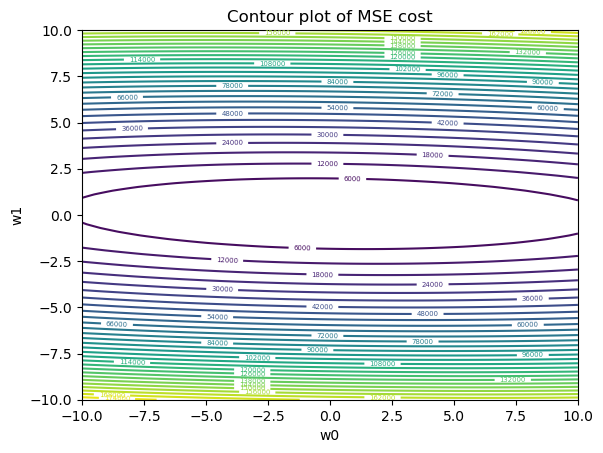

In [13]:
#Below we plot the contour plot of the mse cost in linear regression for different w0 , w1 values

cp = plt.contour(W0,W1,costs,levels = 30)
plt.clabel(cp,fontsize = 5)
plt.title("Contour plot of MSE cost")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()


Text(0, 0.5, 'loss mse')

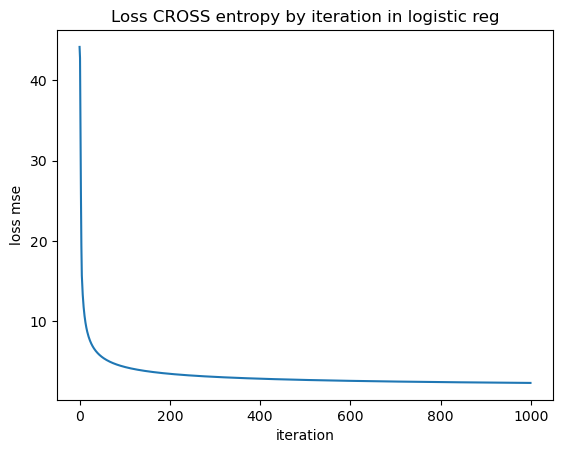

In [14]:

#Cross entropy cost function plotting and model fitting : 

model = log_reg(x,y)
weights,losses = model.gradient_descent(1000,0.01)

plt.plot(losses)
plt.title("Loss CROSS entropy by iteration in logistic reg")
plt.xlabel("iteration")
plt.ylabel("loss mse")


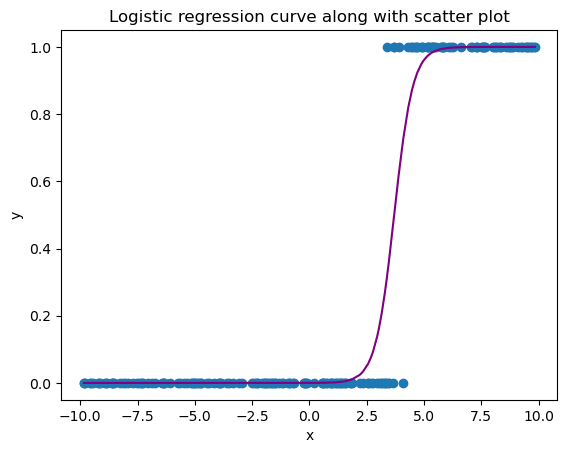

In [15]:
#We plot the sigmoid curve obtained with the weights obtained on logistic regression with scatter plot the points

predicted = sigmoid(weights@x)
linex = x[1].reshape((200,))
plt.scatter(x[1].reshape((1,200)),y)
plt.plot(linex,predicted.reshape(200,),color = "purple")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logistic regression curve along with scatter plot")
plt.show()


Text(0.5, 0, 'loss')

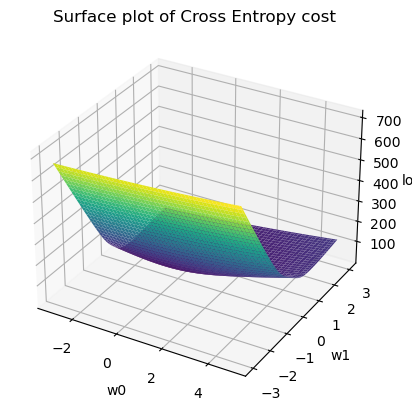

In [16]:
#Below we plot the surface plot of the Cross entropy cost for different w0 , w1 values

w0 = np.linspace(-3,5,100)
w1 = np.linspace(-3,3,100)

W0,W1 = np.meshgrid(w0,w1)
costs = np.zeros(10000).reshape((100,100))

for i in range(100):
    for j in range(100):
        costs[i][j] = loss_log(np.array([[W0[i][j],W1[i][j]]]),x,y)


fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
cp = ax.plot_surface(W0,W1,costs,cmap = "viridis")
ax.set_title("Surface plot of Cross Entropy cost")
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("loss")



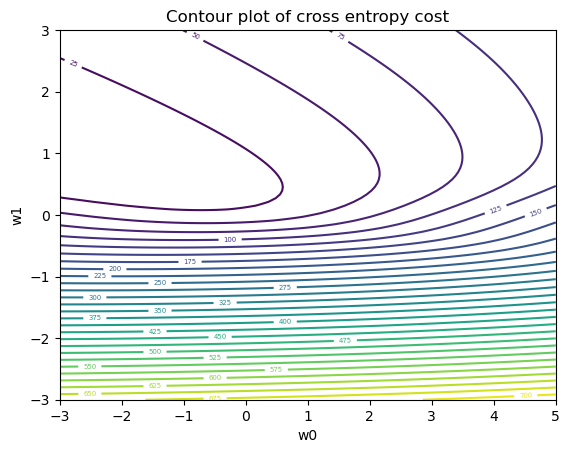

In [17]:
#Below we plot the contour plot of the Cross entropy cost for different w0 , w1 values


cp = plt.contour(W0,W1,costs,levels = 30)
plt.clabel(cp,fontsize = 5)
plt.title("Contour plot of cross entropy cost")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()
